<a href="https://colab.research.google.com/github/pavan581/earth-git/blob/master/beta_veg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [3]:
# Impotr and initialize Earth Engine
import ee

#ee.Authenticate()
ee.Initialize()

In [4]:
# GeoJSON to work with GeoJson Files
import geojson

# Libraries to plot maps
import matplotlib.pyplot as plt
from IPython.display import Image

import folium
from ipyleaflet import GeoJSON
import geemap

%matplotlib inline

#### Run below cell in Colab Only

In [ ]:
!pip install geojson
!pip install geemap

# Git Repository of the Project
!git clone https://github.com/pavan581/earth-git.git

# Data and Feature Import

#### Feature collection

In [ ]:
dict_collec = ee.FeatureCollection('users/sairamg581/ap_districts')
dict_feature = dict_collec.filter("DISTRICT == 'East Godavari'")
aoi = dict_feature.geometry()

In [5]:
import geemap
import requests as req

In [ ]:
geemap.ee_export_vector(dict_feature, './zeta.shp')

In [ ]:
img = ee.ImageCollection("COPERNICUS/S2_SR")\
        .filterBounds(aoi)\
        .filterDate(ee.Date('2022-01-01'), ee.Date('2022-03-10'))\
        .filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE', 5))\
        .mean()\
        .clip(aoi)

#### Map visualization

In [ ]:
Map = geemap.Map()  # Add Google Satellite
Map.setCenter(82.5, 17.2, zoom=8.5)
Map

In [ ]:
Map.addLayer(img, vizParams, 'AOI Geo')

In [ ]:
url = img.select(['B4', 'B3', 'B2']).getThumbURL({'min':0, 'max':4000})
Image(url=url, width=200)

#### Visualization parameters

In [ ]:
#Define the visualization parameters.
vizParams = {'bands': ['B4', 'B3', 'B2'], 'min': 0.0,'max': 4000}
ndviParams = {'min': -1, 'max': 1, 'palette': ['yellow', 'white', 'green']}
ndwiParams = {'min': -1, 'max': 1, 'palette': ['red', 'green', 'blue']}

#### NDVI

In [ ]:
ndvi = img.normalizedDifference(['B8', 'B4'])
Map.addLayer(ndvi, ndviParams, 'NDVI');

#### NDWI

In [ ]:
ndwi = img.normalizedDifference(['B3', 'B8'])
Map.addLayer(ndwi, ndwiParams, 'NDWI');

# Testing...

Feature Area

In [ ]:
area = aoi.area()

totalAreaSqKm = ee.Number(area).divide(1e6).round().getInfo()
print(totalAreaSqKm)

Image area

In [ ]:
areaImage = ndvi_met.multiply(ee.Image.pixelArea())
area = areaImage.reduceRegion(reducer=ee.Reducer.sum(), geometry=aoi, scale=500, maxPixels=1e10)

ndviAreaSqKm = ee.Number(area.get('nd')).divide(1e6).round().getInfo()
print('Total NDVI Area: ', ndviAreaSqKm)

In [ ]:
vegetation.getInfo()

In [ ]:
vegetation = ndvi.gt(0.45).selfMask()
Map.addLayer(vegetation, {'palette': 'green'}, 'Vegetation')

In [ ]:
vegetation = ndvi.gt(0).selfMask()
water = ndwi.gt(0).selfMask()

Map.addLayer(vegetation, {'palette': ['yellow', 'green']}, 'Vegetation')
Map.addLayer(water, {'palette':['red', 'blue']}, 'Water')

In [ ]:
areaImage = vegetation.multiply(ee.Image.pixelArea())
area = areaImage.reduceRegion(reducer=ee.Reducer.sum(), geometry=aoi, scale=500, maxPixels=1e10)

vegetation_area = ee.Number(area.get('nd')).divide(1e6).round().getInfo()
print('Vegetation Area: ', vegetation_area)

In [ ]:
areaImage = water.multiply(ee.Image.pixelArea())
area = areaImage.reduceRegion(reducer=ee.Reducer.sum(), geometry=aoi, scale=500, maxPixels=1e10)

water_area = ee.Number(area.get('nd')).divide(1e6).round().getInfo()
print('Water Area: ', water_area)

In [ ]:
geemap.ee_to_numpy(img)

In [ ]:
geemap.ee_search()

In [6]:
# Data manipulation
# ==============================================================================
import numpy as np
import pandas as pd

# Plots
# ==============================================================================
import matplotlib.pyplot as plt
%matplotlib inline

# Warnings configuration
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [1]:
# Modeling and Forecasting
# ==============================================================================
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.ForecasterAutoregCustom import ForecasterAutoregCustom
from skforecast.ForecasterAutoregMultiOutput import ForecasterAutoregMultiOutput
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import backtesting_forecaster

from joblib import dump, load

In [ ]:
# Data download
# ==============================================================================
url = 'https://raw.githubusercontent.com/JoaquinAmatRodrigo/skforecast/master/data/h2o_exog.csv'
data = pd.read_csv(url, sep=',')

In [ ]:
# Data preparation
# ==============================================================================
data = data.rename(columns={'fecha': 'date'})
data['date'] = pd.to_datetime(data['date'], format='%Y/%m/%d')
data = data.set_index('date')
data = data.rename(columns={'x': 'y'})
data = data.asfreq('MS')
data = data.sort_index()
data.head()

In [ ]:
# Verify that a temporary index is complete
# ==============================================================================
(data.index == pd.date_range(start=data.index.min(),
                             end=data.index.max(),
                             freq=data.index.freq)).all()

In [ ]:
# Split data into train-test
# ==============================================================================
steps = 36
data_train = data[:-steps]
data_test  = data[-steps:]

fig, ax=plt.subplots(figsize=(9, 4))
data_train['y'].plot(ax=ax, label='train')
data_test['y'].plot(ax=ax, label='test')
ax.legend();

In [ ]:
# Create and train forecaster
# ==============================================================================
forecaster = ForecasterAutoreg(
                regressor = RandomForestRegressor(random_state=123),
                lags = 6
                )

forecaster.fit(y=data_train['y'])
forecaster

In [ ]:
# Predictions
# ==============================================================================
steps = 36
predictions = forecaster.predict(steps=steps)
predictions.head()

In [ ]:
predictions

In [ ]:
# Plot
# ==============================================================================
fig, ax = plt.subplots(figsize=(9, 4))
data_train['y'].plot(ax=ax, label='train')
data_test['y'].plot(ax=ax, label='test')
predictions.plot(ax=ax, label='predictions')
ax.legend();

In [ ]:
# Error
# ==============================================================================
error_mse = mean_squared_error(
                y_true = data_test['y'],
                y_pred = predictions
                )
print(f"Test error (mse): {error_mse}")

In [ ]:
# Hyperparameter Grid search
# ==============================================================================
forecaster = ForecasterAutoreg(
                regressor = RandomForestRegressor(random_state=123),
                lags      = 12 # This value will be replaced in the grid search
                )

# Regressor's hyperparameters
param_grid = {'n_estimators': [100, 500],
              'max_depth': [3, 5, 10]}

# Lags used as predictors
lags_grid = [10, 20]

results_grid = grid_search_forecaster(
                        forecaster         = forecaster,
                        y                  = data_train['y'],
                        param_grid         = param_grid,
                        lags_grid          = lags_grid,
                        steps              = 10,
                        refit              = True,
                        metric             = 'mean_squared_error',
                        initial_train_size = int(len(data_train)*0.5),
                        return_best        = True,
                        verbose            = False
                        )

In [ ]:
# Grid Search results
# ==============================================================================
results_grid

In [ ]:
# Create and train forecaster with the best hyperparameters
# ==============================================================================
regressor = RandomForestRegressor(max_depth=3, n_estimators=500, random_state=123)

forecaster = ForecasterAutoreg(
                regressor = regressor,
                lags      = 20
                )

forecaster.fit(y=data_train['y'])

In [ ]:
# Predictions
# ==============================================================================
predictions = forecaster.predict(steps=steps)

In [ ]:
# Plot
# ==============================================================================
fig, ax = plt.subplots(figsize=(9, 4))
data_train['y'].plot(ax=ax, label='train')
data_test['y'].plot(ax=ax, label='test')
predictions.plot(ax=ax, label='predictions')
ax.legend();

# Old

In [ ]:
data = req.get('https://raw.githubusercontent.com/pavan581/earth-git/master/2011_Dist.json').json()

for dist in data['features']:
    if dist["properties"]["DISTRICT"] == 'East Godavari':
        aoi_data = dist
        break

aoi_coords = aoi_data["geometry"]["coordinates"]
aoi = ee.Geometry.Polygon(aoi_coords)

In [9]:
images = []

In [10]:
import ee
import pandas as pd
import matplotlib.pyplot as plt

try:
    ee.Initialize()
except ee.EEException:
    ee.Authenticate()
    ee.Initialize()
finally:
    print("INFO : Earth Engine Initialized.")


def area_calc(img):
    areaImage = img.multiply(ee.Image.pixelArea())
    area = areaImage.reduceRegion(reducer=ee.Reducer.sum(), geometry=aoi, scale=500, maxPixels=1e10)
    area_cover = ee.Number(area.get("nd")).divide(1e6).round().getInfo()
    return area_cover


dict_collec = ee.FeatureCollection("users/sairamg581/ap_districts")
dict_feature = dict_collec.filter("DISTRICT == 'East Godavari'")
aoi = dict_feature.geometry()

# Map.addLayer(aoi, {}, 'AOI')
DistArea = ee.Number(aoi.area()).divide(1e6).round().getInfo()
print("Area of East Godavari District :", DistArea, "Sq.Kms")

# Define the visualization parameters.
vizParams = {"bands": ["B4", "B3", "B2"], "min": 0.0, "max": 4000}
ndviParams = {"min": -1, "max": 1, "palette": ["yellow", "white", "green"]}
ndwiParams = {"min": -1, "max": 1, "palette": ["red", "green", "blue"]}

data = {"date": [], "veg_area": [], "wet_area": []}

for year in range(2018, 2022):
    for month in range(1, 13):
        image = (
            ee.ImageCollection("COPERNICUS/S2_SR")
            .filterBounds(aoi)
            .filterDate(ee.Date(f"{year}-{month}-01"), ee.Date(f"{year}-{month}-28"))
            .filter(ee.Filter.lt("CLOUDY_PIXEL_PERCENTAGE", 5))
            .mean()
            .clip(aoi)
        )
        try:
            ndvi = image.normalizedDifference(["B8", "B4"])
            ndwi = image.normalizedDifference(["B3", "B8"])

            vegetation = ndvi.gt(0.45).selfMask()
            wet_land = ndwi.gt(0).selfMask()
            print('here 1')

            date = "-".join([str(month), str(year)])
            veg_area = area_calc(vegetation)
            wet_area = area_calc(wet_land)

            data["date"].append("-".join([str(month), str(year)]))
            data["veg_area"].append(veg_area)
            data["wet_area"].append(wet_area)
        
            images.append(vegetation)
            print('here 2')

        except Exception as e:
            print(e, month, year, sep="--")
data = pd.DataFrame(data)
data["date"] = pd.to_datetime(data["date"])
data = data.set_index("date")

print("Run successful.")


INFO : Earth Engine Initialized.
Area of East Godavari District : 10880 Sq.Kms
here 1
Image.normalizedDifference: No band named 'B8'. Available band names: [].--1--2018
here 1
Image.normalizedDifference: No band named 'B8'. Available band names: [].--2--2018
here 1
Image.normalizedDifference: No band named 'B8'. Available band names: [].--3--2018
here 1
Image.normalizedDifference: No band named 'B8'. Available band names: [].--4--2018
here 1
Image.normalizedDifference: No band named 'B8'. Available band names: [].--5--2018
here 1
Image.normalizedDifference: No band named 'B8'. Available band names: [].--6--2018
here 1
Image.normalizedDifference: No band named 'B8'. Available band names: [].--7--2018
here 1
Image.normalizedDifference: No band named 'B8'. Available band names: [].--8--2018
here 1
Image.normalizedDifference: No band named 'B8'. Available band names: [].--9--2018
here 1
Image.normalizedDifference: No band named 'B8'. Available band names: [].--10--2018
here 1
Image.normali

In [11]:
data

,veg_area,wet_area
date,,
2018-12-01,2118,111
2019-01-01,6792,316
2019-02-01,8110,306
2019-03-01,7350,269
2019-04-01,5693,264
2019-05-01,3924,293
2019-06-01,2785,18
2019-11-01,5934,98
2019-12-01,7116,330


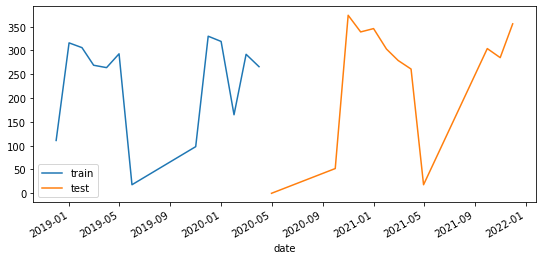

In [93]:
steps = int(len(data)/2)
data_train = data[:-steps]
data_test  = data[-steps:]

fig, ax=plt.subplots(figsize=(9, 4))
data_train['wet_area'].plot(ax=ax, label='train')
data_test['wet_area'].plot(ax=ax, label='test')
ax.legend();

In [94]:
forecaster = ForecasterAutoreg(
                regressor = RandomForestRegressor(random_state=123),
                lags = 6
                )

forecaster.fit(y=data_train['wet_area'])
forecaster

ForecasterAutoreg 
Regressor: RandomForestRegressor(random_state=123) 
Lags: [1 2 3 4 5 6] 
Window size: 6 
Included exogenous: False 
Type of exogenous variable: None 
Exogenous variables names: None 
Training range: [0, 12] 
Training index type: RangeIndex 
Training index frequency: 1 
Regressor parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 123, 'verbose': 0, 'warm_start': False} 
Creation date: 2022-03-28 15:59:15 
Last fit date: 2022-03-28 15:59:15 
Skforecast version: 0.4.1 

In [95]:
predictions = forecaster.predict(steps=steps)
predictions.index=data[-steps:].index
predictions

date
2020-05-01     86.16
2020-10-01    122.08
2020-11-01    270.88
2020-12-01    150.07
2021-01-01    252.56
2021-02-01    260.81
2021-03-01    234.49
2021-04-01    234.98
2021-05-01    253.34
2021-10-01    235.92
2021-11-01    244.02
2021-12-01    245.03
Name: pred, dtype: float64

In [96]:
data[-steps:].index

DatetimeIndex(['2020-05-01', '2020-10-01', '2020-11-01', '2020-12-01',
               '2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01',
               '2021-05-01', '2021-10-01', '2021-11-01', '2021-12-01'],
              dtype='datetime64[ns]', name='date', freq=None)

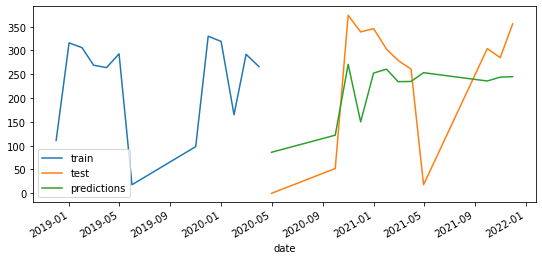

In [97]:
fig, ax = plt.subplots(figsize=(9, 4))
data_train['wet_area'].plot(ax=ax, label='train')
data_test['wet_area'].plot(ax=ax, label='test')
predictions.plot(ax=ax, label='predictions')
ax.legend();

In [92]:
error_mse = mean_squared_error(
                y_true = data_test['wet_area'],
                y_pred = predictions
                )
print(f"Test error (mse): {error_mse}")

Test error (mse): 12153.812066666667


In [ ]:
col = ee.ImageCollection(images)

In [ ]:
vegetation.getInfo()

In [ ]:
len(images)

In [ ]:
import requests

In [ ]:
url='https://earthengine.googleapis.com/v1alpha/projects/earthengine-legacy/videoThumbnails/b6d5322d1dfd9384e93cdb50d53fb3f6-e470fd1452a3ab7fb045c97075379d20:getPixels'
with open('./static/zeta.gif', 'wb') as f:
    f.write(requests.get(url).content)

In [ ]:
open('./zeta.gif', "w").write(requests.get(r'https://earthengine.googleapis.com/v1alpha/projects/earthengine-legacy/videoThumbnails/b6d5322d1dfd9384e93cdb50d53fb3f6-e470fd1452a3ab7fb045c97075379d20:getPixels').content)

In [ ]:
video_args = {
  'dimensions': 500,
  'region': aoi,
  'crs': 'EPSG:3857',
  'bands':['nd'],
  'palette': 'green'
}

# Get URL that will produce the animation when accessed.
col.getVideoThumbURL(video_args)

In [ ]:
data

In [ ]:
data.index[-1].month_name()

In [ ]:
vegetation

In [ ]:
import geemap

In [ ]:
Map = geemap.Map()  # Add Google Satellite
Map.setCenter(82.5, 17.2, zoom=8.5)
Map

In [ ]:
Map.addLayer(vegetation, {'palette': 'green'}, 'Vegetation')

In [ ]:
Map.to_image(outfile="./zeta.png", monitor=1)

In [ ]:
Map.to_html(outfile="./zeta.html", title='My Map', width='100%', height='880px')